([<matplotlib.axis.XTick at 0x10f9d1290>,
 <a list of 17 Text xticklabel objects>)

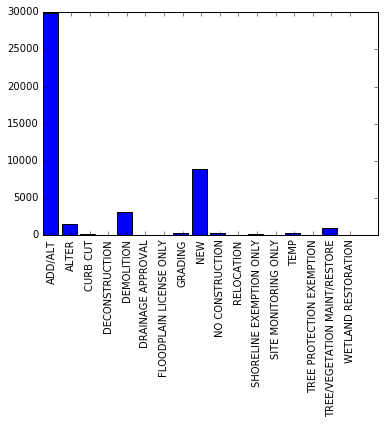

In [9]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Fetch our data
query = {
    "$select" : "action_type, COUNT(*) AS count, AVG(value) AS avg_value",
    "$group" : "action_type",
    "$order" : "action_type",
    "$where" : "action_type IS NOT NULL"
}
r = requests.get("https://data.seattle.gov/resource/i5jq-ms7b.json", params=query)

# Aggregate it
action_types = []
counts = []
for agg in json.loads(r.text):
    action_types.append(agg["action_type"])
    counts.append(agg["count"])
    
# Plot it!
x = np.arange(len(action_types))
plt.bar(x, counts)
plt.xticks(x + 0.5, action_types, rotation=90)
